# Exploring Energy Consumption Between Croatia and Slovenia Since 1991

## Introduction

The following data comes from an Energy repository from Our World in Data, which includes a wide range of indicators related to energy consuption, various energy sources, economic indicators, and electricity generation. The final datasets describes energy profiles of Slovenia and Coratia, with rows representing each country from the years 1991 to 2022, and columns that describe demographic information, energy production, energy consuption, per capita metrics, electricity demand and so forth. 

By implementing unsupervised techniques like PCA/SVD Analysis, KMeans clustering, and Hierarchical Clustering, the objective is to find patterns, structures, or groupings among the data. Projecting high-dimensional energy data into 2D/3D space using dimensionality reduction, like PCA/SVD Analysis, might help visualize trajectories of energy evolution and compare the two countries across time periods. Clustering techniques like KMeans might help group years based on similar energy consumption patterns to discover historical trends or energy shifts.

## Theoretical Background

Unsupervised learning are machine learning algorithms that learn from unlabled data, with a goal of understanding structure of the data or exploring the data further. These types of models may be useful when you dont know the initial goal or you want to learn more about how the data can be grouped into clusters. Some examples of unsupervised learning include prinical component analysis (PCA), Singular Value Decomposition (SVD), Matrix Completion, KMeans clustering, and Hierarchical Clustering.

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used to detect unseen trends and patterns by projecting the data into a lower dimensional space while retaining most of the varaince. PCA transforms a dataset with correlated variables into a new coordinate system by identifying orthogonal axes (principal components) where the data variance is maximized. The first principal component accounts for the largest possible variance of the data, where higher values identify important factors that describe the overall dataset. The second component accounts for the next largest variance, showing relationships that are not captures in the first principal component and so forth. Plotting each data point into the space of the first two principal components can help interpret the model by revealing clusters, outliers, and trends in the data.

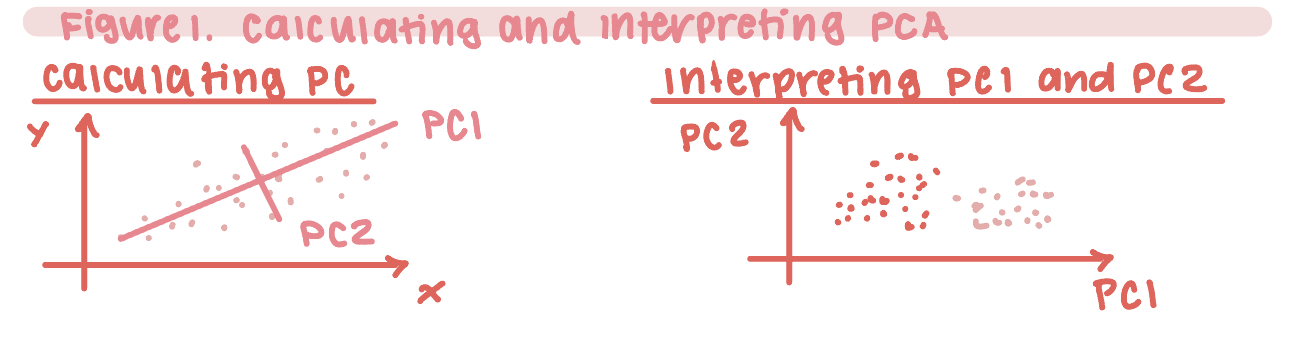

In [266]:
from IPython.display import Image, display
display(Image(filename='IMG_2057.jpeg'))

PCA models can be evaluated by a scree plot which graphs the proportion of variance explained by the number of principal components; this shows how muach variance of the data each principal component describes. By adding up all the varainces captured among principal components, grapphing the cumulative PVE by prinicpal components provides a more clear evaluation that ideally shows the model converging towards 1.0, meaning that most of the variance in the data can be explained by a certain amount of prinicipal components.

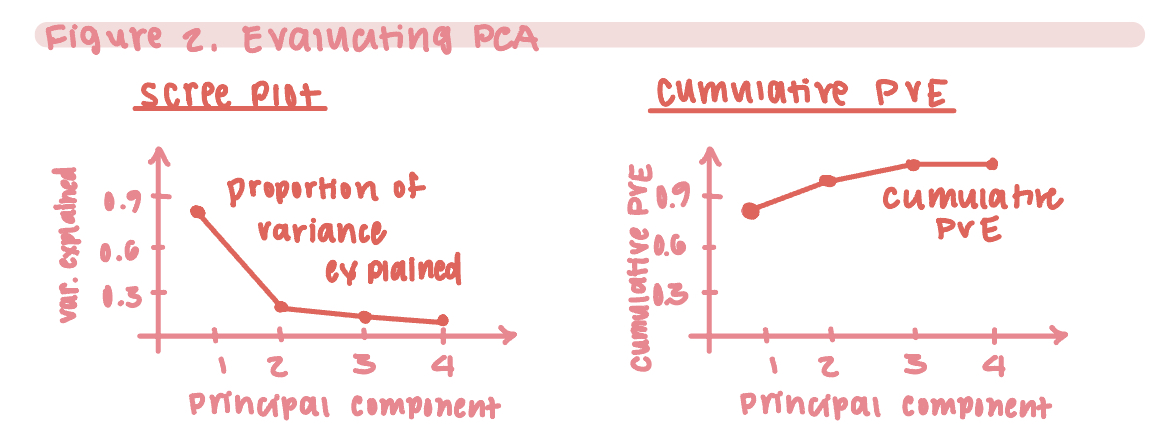

In [267]:
display(Image(filename='IMG_2059.jpeg'))

Singular Value Decomposition (SVD) is a similar technique to PCA, with scaled data, also simialrly used as a dimensionality reduction technique. Given a data matrix (X) of size nxp, it can be decomposed as X=UEV^T. Where U is an nxn matrix that describes the location of each data point in singular vector space, where each column represents a principal component. E is an nxp diagonal matrix of singular values that represent their importance or proportion of variance explained. V^T is the transpose of a pxp orthogonal matrix that shows the direction of variance int he data. 

Matrix completion is a technique that utilizes SVD principals to estimate missing data entires in data sets. SVD helps predict missing values by assuming that the true data lies in lower-dimensional spaces and missing data points can be infered from patterns observed in the principal components. Matrix completion is implemented by first computing the principal components with available data, and then approximating the missing data using the calculated principal components.

KMeans is an unsupervised learning technique that groups data points by minimizing the varaince between the data points and cluster centroids. The algorithm seeks to minimize within-cluster variation using eucledian distance. The first step randomly assigns data points into a cluster. Then the center of each cluster is computed and data points are reassiged to observations closest to the cluster centroid, this is repeated until the algorithm converges. KMeans are a good model to use for specifically numerical data that makes sense when distance is a reasonable metric and points all close to their means. A KMeans model is sensitive to its initialization and the selection of the number of clusters (k). Using a Silhouette score to measure how similar a point is to its own cluster versus other clusters can help choose k.

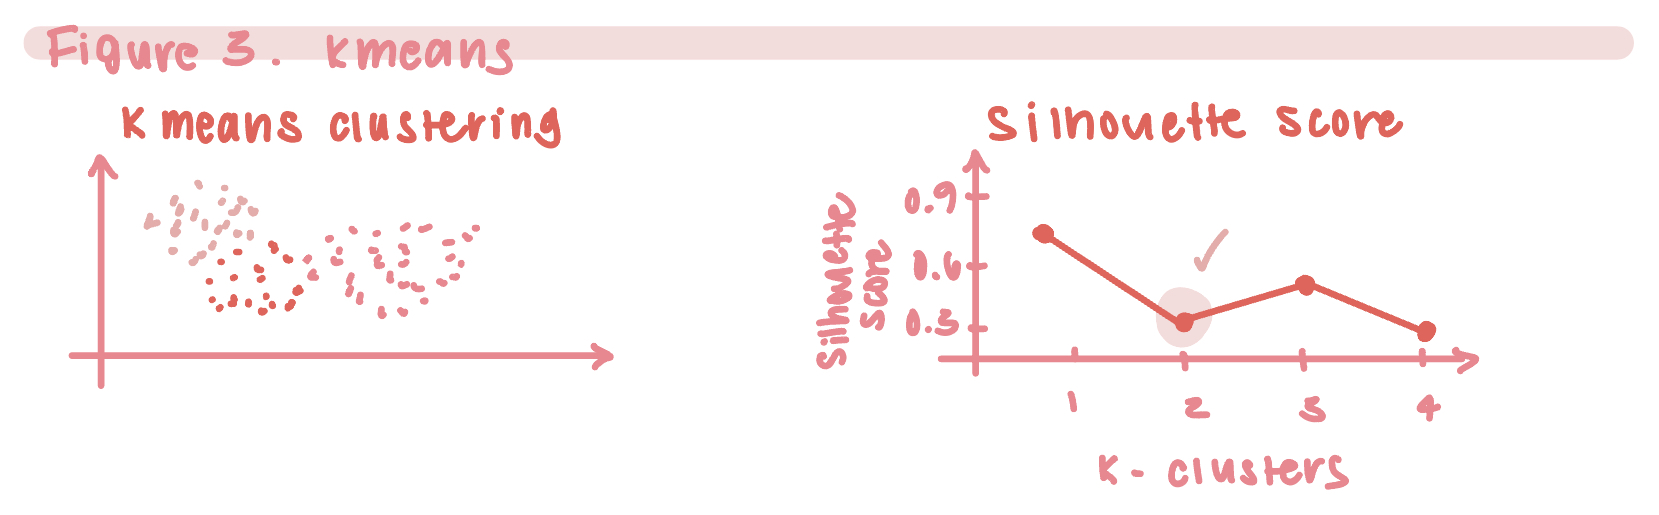

In [268]:
display(Image(filename='IMG_2060.jpeg'))

Hierarchical Clustering is an unsupervised learning method that is used to group similar data points together and organize the data into a tree-like structure called a dendrogram. The linkage of the tree is a measure of the distance between clusters before they are merged or divided. Different types of linkages will be explored to analyze the data including complete linkage, average linkage, and single linkage. Complete linkage calculates distance between clusterns by using maximum pariwise dissimilarity, or identifying the most dissimilar group. Complete linkage is useful when distance is meaningful, and it is expected for the data to have clearly seperated groups. Single linkage is calculated by finding the shortest distance between any single point among two clusters, which find the minimal intercluster dissimilarity. This method is useful in finding chain-like clusters where we might expect the data to be connected by a series of close points or irregular groupings, however this can also lead to clusters getting merged through a single data point and sensitivity to outliers.

## Methodology

The original data comes from and Energy Dataset from 'Our World in Data', which contains annual energy data for various countries worldwide spanning a wide range of 130 columns and over 21,000 rows. This study will focus on analyzing annual energy data specifically from Croatia and Slovenia from 1991 to 2022, including infromation on their demographics, energy production, energy consumption, and energy demands. Since the dataset is sparse, with many columns having over 75% missing values, the study will focus on the countries with the least amount of missing values being Slovenia (4.95% missing values) and Croatia (7.08%). To address missing values within these countries, columns with multiple missing values (10+) were dropped and one row included mainly missing values which was also dropped. This resulted in two data sets with no missing values for Croatia and Slovenia's energy profiles with scaled numerical values. The data for croatia and slovenia are combined into one data frame that is sufficent to perform unsupervised learning techniques and discover unseen patterns among the data.

The PCA model will be implemented on the combined data set, removing non numerical columns like country name and year. The data for both countries descibe their energy profile changes over the span of 32 years (32 rows for each country) and 12 energy related varaibles. The data is standardized using StandardScalar to ensure all features equally contribute to the PCA regardless of their original scale. PCA is applied using 12 components, which is the same as the number of features (energy profile categories). The explained varaince ratio and cumulative explained variance is computed and ploted for both countries. 

Similarly to PCA, an SVD analysis helps reduce high dimensional data into a few dominant trends of the data, in this case we will reduce energy consumption data into a few trends that will help simplify patterns across countries and years while preserving most of the variance. An SVD seperates the data into three interpretable matricies, where U will represent patterns across observations (country and years), S represents the importance or variance captured by each component, and Vt captures pattterns across features (energy types) like PCA's feature weights. SVD is particularly useful when working with asymmetric data, as this model handles non-square and non-centered data well. 

Matrix completion will be implemented using low rank approximization on missing data. The original data will be scaled appropriately with a mean of 0 and standard deviation of 1. Missing values will be artifically introduced. A function (fit_svd) will be defined to reconstruct the matrix using low rank 5 approximation (using only the top M singular values). Then computing the SVD approximation, replacing missing entries, and checking the convergance using mean squared error will be iterated until convergence. 

The KMeans model will be implemented by analyzing both Croatia and Slovenia across various cluster sizes from 2 to 15. The optimal model size (k) will be chosen by analyzing the silhouette score and intertia. A lower within cluster variation (intertia) is ideal but the elbow method will be used to acknowledge diminishing returns. A higher Silhouette score will refelct how well seperated and cohesive the clusters are. Finally, the kmeans model will be implmeneted using the optimal amount of clusters using the silhouette and elbow method, along with a random seed for reproducability, and an inertia of 50 meaning that the algorithm will run on 50 different centroids. The clustering model will be graphed with a goal to show trends over time and between countries among the clusters.

Hierarchical Clustering will be implemented using four different linkage methods including: complete (maximizes inner cluster distance), single (minimiaze distance between nearest points), average, and ward (minimizes variance within clusters). The input data was transposed so each energy source is treated as an observation, where rows are the energy types and columns are the metadata that will be used for labeling (country and year). An initial hierarchical clustering model will be run to retrieve initial clustering assignments and view the results by adding back the country and years. Next, dendrograms will be used to visualize the clustering structure by defining a linkage function and applying the four linkage methods discussed previously. Finally, silhouette analysis will be used to evaluate the optimal number of clusters.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster
from scipy.spatial.distance import pdist
from ISLP.cluster import compute_linkage

In [159]:
np.random.seed(3799)

### Data Cleaning and Exploration

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')

In [161]:
# Check the amount of rows and features
df.shape

(21975, 130)

In [162]:
# Check how many nans there are in the columns
pd.set_option('display.max_rows', None)
df.isna().sum()[df.isna().sum() > 0]

iso_code                                         5013
population                                       3389
gdp                                             10205
biofuel_cons_change_pct                         20169
biofuel_cons_change_twh                         19179
biofuel_cons_per_capita                         19575
biofuel_consumption                             19099
biofuel_elec_per_capita                         16221
biofuel_electricity                             15946
biofuel_share_elec                              15970
biofuel_share_energy                            19197
carbon_intensity_elec                           16262
coal_cons_change_pct                            16677
coal_cons_change_twh                            16559
coal_cons_per_capita                            17221
coal_consumption                                16454
coal_elec_per_capita                            15697
coal_electricity                                15071
coal_prod_change_pct        

There is an overwhelmingly large amount of NaNs in this dataset. We need a way to focus on the data that showcases a complete view of the data, i.e., something that has a lot of data present. We will attempt to solve this by calculating the percentages of NaNs by each country to determine if there are any countries containing a low amount of NaNs. We want this because imputing or utilizing methods to fill in NaNs to select our desired countries could result in an unrepresentative dataset, so it is best to work with the countries that are most complete.

In [163]:
# reset the display to not show all rows
pd.reset_option('display.max_rows')

In [164]:
# calculate the percentage of NaNs present in each row
df_copy = df.copy()
df_copy['nan_percent'] = df_copy.isna().mean(axis=1) * 100

# group by country and derive the mean of the NaN percentage to find the country with the lowest amount of NaNs
mean_nan_percent_by_country = df_copy.groupby('country')['nan_percent'].mean()

# selecting for countries that have their data with less than 10% of NaNs
print(mean_nan_percent_by_country[mean_nan_percent_by_country < 10])

country
Croatia     9.054945
Slovenia    6.989011
Name: nan_percent, dtype: float64


The criteria of less than 10% of NaNs shows that there are only two countries present that are able to be worked with. We will use these specific countries for our purposes. Now, we will clean the rest of the NaNs in these countries since utilizing particular unsupervised learning methods requires no NaNs to be present.

In [165]:
croatia = df[df['country'] == 'Croatia']

In [166]:
# determine the columns containing NaNs
croatia_nans = croatia.isna().sum()[croatia.isna().sum() > 0]
croatia_nans

gdp                         2
biofuel_cons_change_pct    20
biofuel_cons_change_twh    19
biofuel_cons_per_capita    18
biofuel_consumption        18
                           ..
wind_cons_change_pct       16
wind_cons_change_twh        2
wind_consumption            1
wind_energy_per_capita      1
wind_share_energy           1
Length: 81, dtype: int64

In [167]:
# Check for rows because we require columns with NaNs that aren't a large proportion of the rows
croatia.shape

(35, 130)

In [168]:
# remove the columns that contain more than one NaN
croatia_no_nans = croatia.loc[:, croatia.isna().sum() <= 1].copy()

In [169]:
# need to find out where the remainder of the NaNs are to determine how they should be removed or imputed
remainder = croatia_no_nans.isna().sum()[croatia_no_nans.isna().sum() > 0]
croatia_nan_idxs = {col: croatia_no_nans.index[croatia_no_nans[col].isna()].tolist() for col in remainder.index}
croatia_nan_idxs

{'coal_cons_per_capita': [5081],
 'coal_consumption': [5081],
 'coal_share_energy': [5081],
 'electricity_share_energy': [5081],
 'energy_per_capita': [5081],
 'fossil_energy_per_capita': [5081],
 'fossil_fuel_consumption': [5081],
 'fossil_share_energy': [5081],
 'gas_consumption': [5081],
 'gas_energy_per_capita': [5081],
 'gas_share_energy': [5081],
 'hydro_consumption': [5081],
 'hydro_energy_per_capita': [5081],
 'hydro_share_energy': [5081],
 'low_carbon_consumption': [5081],
 'low_carbon_energy_per_capita': [5081],
 'low_carbon_share_energy': [5081],
 'nuclear_consumption': [5081],
 'nuclear_energy_per_capita': [5081],
 'nuclear_share_energy': [5081],
 'oil_consumption': [5081],
 'oil_energy_per_capita': [5081],
 'oil_share_energy': [5081],
 'other_renewable_consumption': [5081],
 'other_renewables_energy_per_capita': [5081],
 'other_renewables_share_energy': [5081],
 'primary_energy_consumption': [5081],
 'renewables_consumption': [5081],
 'renewables_energy_per_capita': [5081]

Clearly, the 5081th index is empty, so we can be confident to drop that. 

In [170]:
# drop the 5081th index
croatia_no_nans.drop([5081], inplace=True)

In [171]:
# double check that there are no more NaNs
croatia_no_nans.isna().sum()[croatia_no_nans.isna().sum() > 0]

Series([], dtype: int64)

In [172]:
# Set up slovenia to be cleaned
slovenia = df[df['country'] == 'Slovenia']

In [173]:
# determine the columns containing NaNs
slovenia_nans = slovenia.isna().sum()[slovenia.isna().sum() > 0]
slovenia_nans

gdp                         2
biofuel_cons_change_pct    18
biofuel_cons_change_twh     2
biofuel_cons_per_capita     1
biofuel_consumption         1
                           ..
wind_cons_change_pct       25
wind_cons_change_twh        2
wind_consumption            1
wind_energy_per_capita      1
wind_share_energy           1
Length: 81, dtype: int64

In [174]:
# Check for rows because we require columns with NaNs that aren't a large proportion of the rows
slovenia.shape

(35, 130)

In [175]:
# remove the columns that contain more than one NaN
slovenia_no_nans = slovenia.loc[:, slovenia.isna().sum() <= 1].copy()

In [176]:
# need to find out where the remainder of the NaNs are to determine how they should be removed or imputed
remainder_slov = slovenia_no_nans.isna().sum()[slovenia_no_nans.isna().sum() > 0]
slovenia_nan_idxs = {col: slovenia_no_nans.index[slovenia_no_nans[col].isna()].tolist() for col in remainder_slov.index}
slovenia_nan_idxs

{'biofuel_cons_per_capita': [17648],
 'biofuel_consumption': [17648],
 'biofuel_share_energy': [17648],
 'coal_cons_per_capita': [17648],
 'coal_consumption': [17648],
 'coal_share_energy': [17648],
 'electricity_share_energy': [17648],
 'energy_per_capita': [17648],
 'fossil_energy_per_capita': [17648],
 'fossil_fuel_consumption': [17648],
 'fossil_share_energy': [17648],
 'gas_consumption': [17648],
 'gas_energy_per_capita': [17648],
 'gas_share_energy': [17648],
 'hydro_consumption': [17648],
 'hydro_energy_per_capita': [17648],
 'hydro_share_energy': [17648],
 'low_carbon_consumption': [17648],
 'low_carbon_energy_per_capita': [17648],
 'low_carbon_share_energy': [17648],
 'nuclear_consumption': [17648],
 'nuclear_energy_per_capita': [17648],
 'nuclear_share_energy': [17648],
 'oil_consumption': [17648],
 'oil_energy_per_capita': [17648],
 'oil_share_energy': [17648],
 'other_renewable_consumption': [17648],
 'other_renewables_energy_per_capita': [17648],
 'other_renewables_share_e

Luckily, the Slovenia data is also showing only one row that has missing values.

In [177]:
# drop index 17648 
slovenia_no_nans.drop([17648], inplace=True)

In [178]:
# double check that there are no more NaNs
slovenia_no_nans.isna().sum()[slovenia_no_nans.isna().sum() > 0]

Series([], dtype: int64)

In [179]:
# assign the variables back to workable names for efficiency
slovenia_df = slovenia_no_nans
croatia_df = croatia_no_nans

In [180]:
# isolate the numerical variables 
croatia_df_numeric = croatia_df.drop(['year', 'country', 'iso_code'], axis =1).copy()
slovenia_df_numeric = slovenia_df.drop(['year', 'country', 'iso_code'], axis =1).copy()

We want to determine the primary means of energy consumption for Slovenia and Croatia. Therefore, we will isolate only the columns that are associated with types of energy consumption.

In [181]:
# isolate the consumption columns
consumption_columns_croatia = [col for col in croatia_df_numeric.columns if 'consumption' in col]
consumption_columns_slovenia = [col for col in slovenia_df_numeric.columns if 'consumption' in col]

In [182]:
# select only the consumption columns in the dataframe
croatia_consumption = croatia_df_numeric[consumption_columns_croatia]
slovenia_consumption = slovenia_df_numeric[consumption_columns_slovenia]

In [183]:
# gather the years for each country to use as indices
years_croatia = croatia_df['year']
years_slovenia = slovenia_df['year']

In [184]:
# scale the data for preparation to be used in the models
croatia_scaled = StandardScaler().fit_transform(croatia_consumption)
slovenia_scaled = StandardScaler().fit_transform(slovenia_consumption)

In [185]:
# put the scaled data back into a dataframe, using the years as indices
croatia_dfscaled = pd.DataFrame(croatia_scaled, columns=croatia_consumption.columns, index=years_croatia.values)
slovenia_dfscaled = pd.DataFrame(slovenia_scaled, columns=slovenia_consumption.columns, index=years_slovenia.values)

In [186]:
# table head of reasonable variables
slovenia_dfscaled.head()

,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,-0.799097,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,-0.799097,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,-0.799097,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,-0.799097,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,-0.799097,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [187]:
croatia_dfscaled.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.750954,1.432470,-0.545541,-1.747730,-1.727151,0.0,1.419182,-0.575932,0.442316,-1.727151,-0.477624,-0.666207
1991,-0.177882,-1.172054,-1.426419,-0.416986,-0.755713,0.0,-0.960016,-0.578361,-1.690580,-0.755713,-0.477624,-0.666207
1992,-0.477798,-1.145151,-1.023092,-1.390346,-1.469368,0.0,-0.960016,-0.588888,-2.099751,-1.469368,-0.477624,-0.666207
1993,-0.804426,-0.804625,-0.384490,-1.224108,-1.339557,0.0,-0.631632,-0.554878,-1.663528,-1.339557,-0.477624,-0.666207
1994,-1.497045,-1.010160,-1.098249,-0.491709,-0.812953,0.0,-0.437437,-0.588888,-1.556194,-0.812953,-0.477624,-0.666207


In [188]:
croatia_dfscaled.columns, slovenia_dfscaled.columns

(Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
        'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
        'oil_consumption', 'other_renewable_consumption',
        'primary_energy_consumption', 'renewables_consumption',
        'solar_consumption', 'wind_consumption'],
       dtype='object'),
 Index(['biofuel_consumption', 'coal_consumption', 'fossil_fuel_consumption',
        'gas_consumption', 'hydro_consumption', 'low_carbon_consumption',
        'nuclear_consumption', 'oil_consumption', 'other_renewable_consumption',
        'primary_energy_consumption', 'renewables_consumption',
        'solar_consumption', 'wind_consumption'],
       dtype='object'))

Since we want seamless consistency between the two countries for proper comparison, the columns must match. Therefore, we must drop 'biofuel_consumption' from the Slovenia dataframe for consistency, as it is the only column mismatch between the two countries.

In [189]:
# drop biofuel consumption for consistency
slovenia_dfscaled.drop('biofuel_consumption', axis =1, inplace=True)

In [190]:
# Check to see if it was properly dropped
slovenia_dfscaled.columns

Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
       'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption',
       'solar_consumption', 'wind_consumption'],
      dtype='object')

In [191]:
# Combine data frames for croatia and slovenia

# Add country column
slovenia_dfscaled['country'] = 'Slovenia'
croatia_dfscaled['country'] = 'Croatia'

# Combine them
df = pd.concat([slovenia_dfscaled, croatia_dfscaled])

df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption,country
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167,Slovenia
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167,Slovenia
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167,Slovenia
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167,Slovenia
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167,Slovenia


### Principal Component Analysis (PCA)

In [192]:
df.shape

(68, 13)

In [193]:
df.columns

Index(['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption',
       'hydro_consumption', 'low_carbon_consumption', 'nuclear_consumption',
       'oil_consumption', 'other_renewable_consumption',
       'primary_energy_consumption', 'renewables_consumption',
       'solar_consumption', 'wind_consumption', 'country'],
      dtype='object')

In [194]:
# drop non numerical columns for PCA analysis (country and year)
pca_df = df.drop(columns=['country'])
pca_df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [195]:
# perform PCA with 12 components (the same as the number of columns)
pca = PCA(n_components=12)
x_pca = pca.fit_transform(pca_df)

In [196]:
# get the proportion of variance of each component
explained_var = pca.explained_variance_ratio_

# get the cumulative proportion of variance
cum_explained_var = np.cumsum(explained_var)

### How can the U and V* matrix from the SVD (or "x" and "rotation" from PCA) be interpreted?

In [197]:
# peform the decomposition
U, S, Vt = np.linalg.svd(pca_df, full_matrices=False)

In [198]:
# inspect the shape of each
U.shape, S.shape, Vt.shape

((68, 12), (12,), (12, 12))

In [199]:
# view one of each item
U[:1], S[:1], Vt[:1]

(array([[-0.09678481, -0.23193251,  0.02107957, -0.22590974,  0.00626704,
          0.011872  ,  0.07482818, -0.02129615, -0.10666007, -0.25362289,
          0.05419036, -0.00214513]]),
 array([18.53927234]),
 array([[-0.29887641, -0.30178923, -0.19690802,  0.21456262,  0.35420907,
          0.03776589, -0.17557734,  0.35117324, -0.09213109,  0.38403168,
          0.37939263,  0.3922227 ]]))

### Matrix Completion

In [256]:
# scale data
scaler = StandardScaler()
X = scaler.fit_transform(pca_df)

In [257]:
# intentionally create missing values
np.random.seed(15)
missing_elements = 20

row_index = np.random.choice(X.shape[0], size=missing_elements, replace=False)
column_index = np.random.choice(X.shape[1], size=missing_elements)

Xna = X.copy()
Xna[row_index, column_index] = np.nan

In [258]:
# define SVD approximation (using low rank approximation)
def fit_svd(X, M=1):
    # Compute SVD on X (with no NaNs)
    U, s, Vt = np.linalg.svd(X, full_matrices=False)
    return U[:, :M] @ np.diag(s[:M]) @ Vt[:M, :]

In [259]:
# initialize missing data
Xhat = Xna.copy()
col_means = np.nanmean(Xna, axis=0)
Xhat[np.isnan(Xhat)] = np.take(col_means, np.where(np.isnan(Xhat))[1])

In [260]:
# define iteration parameters
thresh = 1e-7
rel_err = 1
iter_ = 0

ismiss = np.isnan(Xna) 

# compute mse
mss0 = np.mean(np.square(Xna[~ismiss]))

# initial error (mean squared difference between observed and initial guess)
mssold = np.mean(np.square(Xna[~ismiss] - Xhat[~ismiss]))

In [261]:
# iteratively update missing entries using SVD reconstruction
while rel_err > thresh:
    iter_ += 1
    Xapp = fit_svd(Xhat, M=5)  # low-rank approximation (rank=5)
    
    # Update only missing entries with values from approximation
    Xhat[ismiss] = Xapp[ismiss]
    
    # Calculate mean squared error on observed entries
    mss = np.mean(np.square(Xna[~ismiss] - Xapp[~ismiss]))
    
    # Relative error (normalized)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    
    print(f"Iteration: {iter_}, Mean Squared Error: {mss:.6f}, Relative Error: {rel_err:.6f}")

Iteration: 1, Mean Squared Error: 0.063346, Relative Error: -0.063626


In [262]:
corr = np.corrcoef(Xapp[ismiss], X[ismiss])[0, 1]
print(f"Correlation between imputed and true missing values: {corr:.4f}")

Correlation between imputed and true missing values: 0.9608


## K-Means Clustering

In [200]:
# drop non numerical columns for K-means analysis (country and year)
k_means_df = df.drop(columns=['country'])
k_means_df.head()

,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1990,1.142495,-0.944490,-0.026720,-1.282534,-1.454238,-1.067025,-2.236537,-1.27627,-1.562389,-1.317471,-0.598594,-0.683167
1991,0.551032,-1.431899,-0.446172,-0.151356,-0.578242,-0.346544,-2.414246,-1.27627,-1.542929,-0.564384,-0.598594,-0.683167
1992,0.809611,-1.648767,-1.704528,-0.481358,-1.615975,-2.488745,-2.569472,-1.27627,-2.259161,-0.784084,-0.598594,-0.683167
1993,0.506821,-1.096261,-1.751240,-1.173941,-1.986816,-2.521844,-1.509714,-1.27627,-1.965201,-1.245174,-0.598594,-0.683167
1994,0.084401,-0.853463,-1.147801,-0.524192,-1.074047,-1.095506,-1.010446,-1.27627,-1.289946,-0.812601,-0.598594,-0.683167


In [201]:
# Find optimal cluster amount using silhouette score vs inertia
inertia = []
silhouette = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(k_means_df)
    inertia.append(kmeans.inertia_)
    silh = silhouette_score(k_means_df, kmeans.labels_)
    silhouette.append(silh)

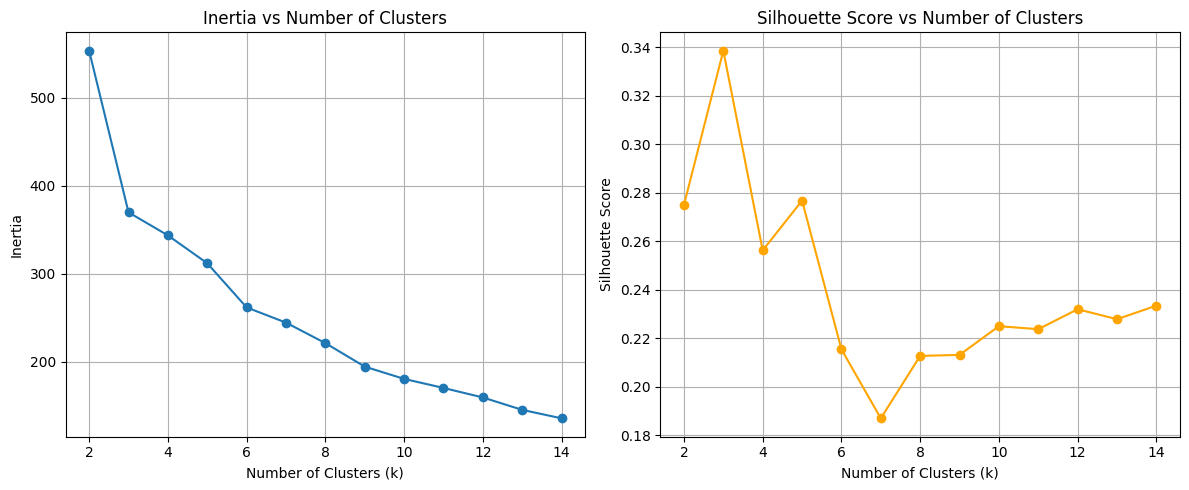

In [202]:
# Plotting the results
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the silhouette vs inertia scores for both Croatia and Slovenia, a good number of clusters is 3 because this is where the silhouette score is highest for each country and where there is a large drop in inertia. It isn't quite at the elbow yet, but we are informed to pick this because of the silhouette score.

In [203]:
# Fit to the decided number of clusters, concluded from inertia vs silh plots
kmeans = KMeans(n_clusters = 3, random_state = 3799, n_init = 50).fit(k_means_df)

In [204]:
# get the cluster labels and assign them to the respected df
k_means_df['Cluster'] = kmeans.labels_

In [205]:
# view variances
    # scaled (mean = 0 , stdev = 1)
variances = k_means_df.var().sort_values(ascending=False)
print(variances.head(10))

coal_consumption              1.014925
hydro_consumption             1.014925
oil_consumption               1.014925
gas_consumption               1.014925
low_carbon_consumption        1.014925
primary_energy_consumption    1.014925
renewables_consumption        1.014925
solar_consumption             1.014925
wind_consumption              1.014925
fossil_fuel_consumption       1.014925
dtype: float64


## Heirarchical Clustering

In [206]:
### Data Cleaning
np.random.seed(3799)

# features (energy types), meta data (country, year)
metadata = df[['country']].copy()
features = df.drop(columns=['country'])

# scale features
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features),
                               columns=features.columns,
                               index=features.index)

In [207]:
# initialize hierarchical clustering
hclust = AgglomerativeClustering()
clusters = hclust.fit_predict(features_scaled)

In [208]:
### clusters

# add back meta data and features
metadata['Cluster'] = clusters
features_scaled['Cluster'] = clusters

# view clusters
combined_df = pd.concat([metadata, features_scaled.drop(columns='Cluster')], axis=1)
combined_df['Cluster'] = clusters

print(combined_df.head())

       country  Cluster  coal_consumption  fossil_fuel_consumption  \
1990  Slovenia        0          1.142495                -0.944490   
1991  Slovenia        0          0.551032                -1.431899   
1992  Slovenia        0          0.809611                -1.648767   
1993  Slovenia        0          0.506821                -1.096261   
1994  Slovenia        0          0.084401                -0.853463   

      gas_consumption  hydro_consumption  low_carbon_consumption  \
1990        -0.026720          -1.282534               -1.454238   
1991        -0.446172          -0.151356               -0.578242   
1992        -1.704528          -0.481358               -1.615975   
1993        -1.751240          -1.173941               -1.986816   
1994        -1.147801          -0.524192               -1.074047   

      nuclear_consumption  oil_consumption  other_renewable_consumption  \
1990            -1.509002        -2.236537                     -1.27627   
1991            -0.4

In [209]:
# data for graphs
df_features = df.drop(columns=['country'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


features_scaled = pd.DataFrame(scaler.fit_transform(features),
                               columns=features.columns,
                               index=df.index)
df_scaled = features_scaled.copy()
df_scaled['country'] = df['country']

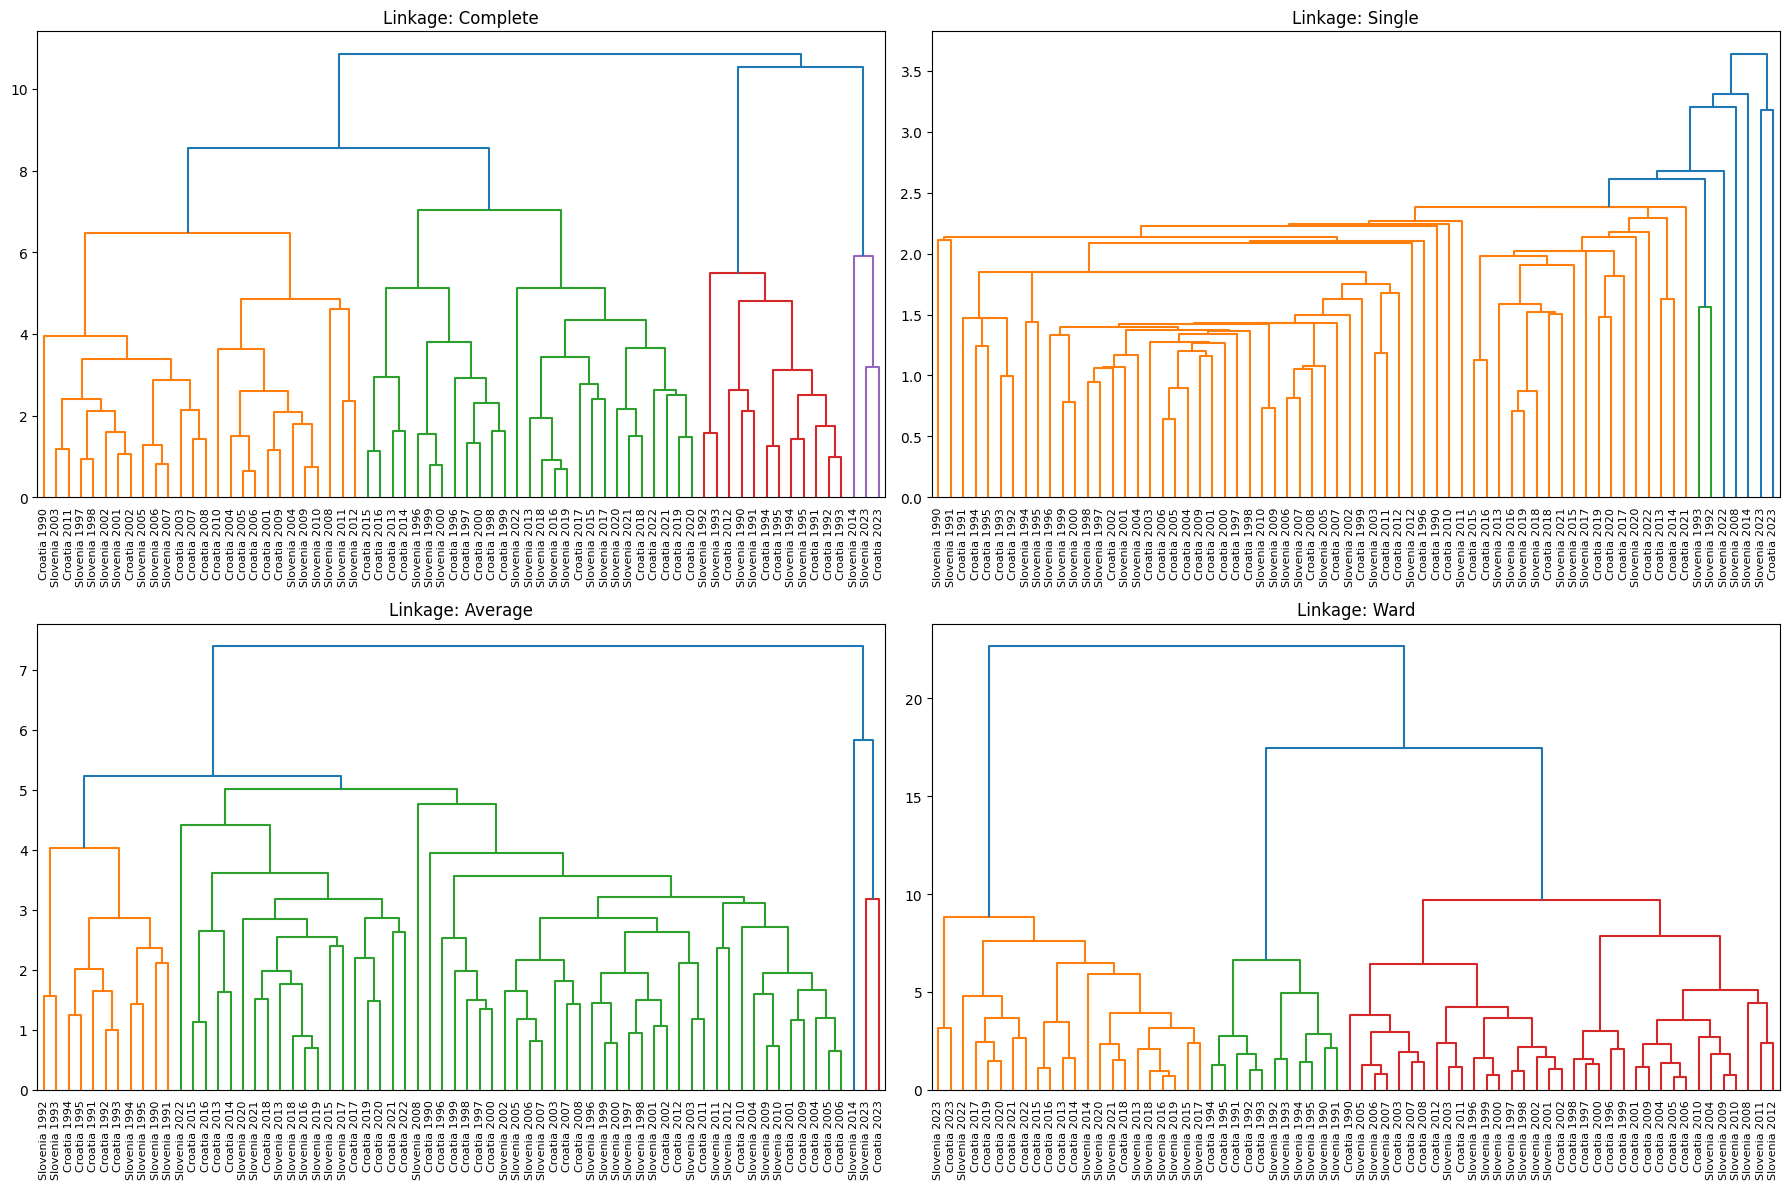

In [210]:
# Define helper to compute linkage
import numpy as np
def compute_linkage(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, 
        model.distances_, 
        counts
    ]).astype(float)
    return linkage_matrix

# year as label
labels = df_scaled.apply(lambda row: f"{row['country']} {row.name}", axis=1).values

# Extract features only for clustering
X = df_scaled.drop(columns=['country'])

# Dendrograms for 4 linkage methods
linkages = ['complete', 'single', 'average', 'ward']
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for ax, method in zip(axs.flat, linkages):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    model = model.fit(X)
    Z = compute_linkage(model)
    
    ax.set_title(f"Linkage: {method.capitalize()}")
    dendrogram(Z, ax=ax, labels=labels, leaf_rotation=90)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

The complete linkage merges clusers based on the maximum distance between two points. This plot generally looks pretty good, clearly showing about four well seperated clusters. This sould be a great model choice overall, showing balanced clustering and minimal chaining effects where one point is added to a cluster at a time.

Single linkage merges clusted based on minimal distance, and this dendrogram clearly shows a chaning effect where many country-year paris are added on one at a time with only few breaks of clear clustreing. This model is not ideal for this dataset as clusters are not seperated well for visualization and interpretation.

Average linking clusters based on averager distance between clusters, this results in a compact and moderately seperated classes. The main groups being early energy consumption pre-industrialization, with most of the points representing a transiional period and likely energy boom in consumption, and only recent years showing a true change in eneryg profile likely towards renewables. 

Ward linkage merges clusters by minimizing the increase of within-cluster variance. This is the most well structured and compact of all clusters that clearly seperates time periods and differing energy profiles. This model would be the most ideal for asessing the energy profiles of varying countries over time. 

## Results

### PCA
The scree plot shows the proportion of variance explained by each prinicipal component, and the aggregated graph explores the optimal number of prinicpal components that effectively capture the most varaince of this datast, with the goal of capturing 100% of the cumulative varaince explained with the least amount of principal components. The first 8 principal components explain most of the variance in the data, with the first principal component explaining almost half (~46%) of the total variance. In this case, 8 principal components are able to explain complex relationships of the energy profiles among Slovenia and Croatia. 

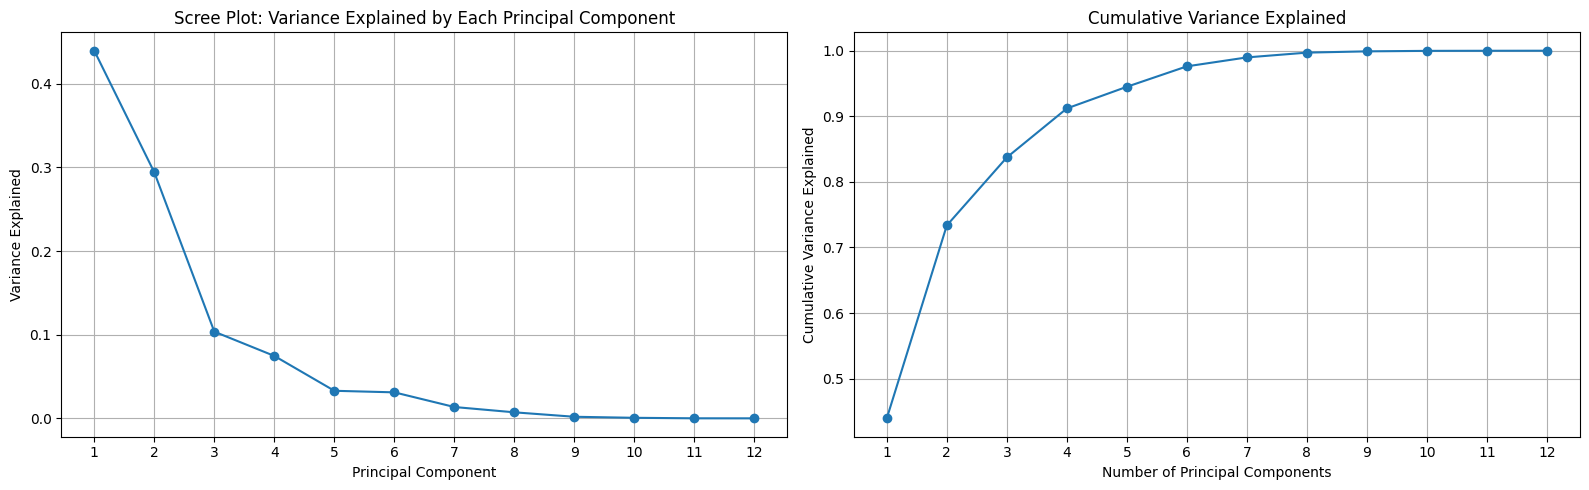

In [211]:
# plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Variance explained by each principal component
axes[0].plot(range(1, 13), explained_var, 'o-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Scree Plot: Variance Explained by Each Principal Component')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True)

# Plot 2: Cumulative variance explained
axes[1].plot(range(1, 13), cum_explained_var, 'o-')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_title('Cumulative Variance Explained')
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)

# show plot
plt.tight_layout()
plt.show()

Analyzing the weights of each energy feature on the principal components will explore how much each energy feature contributes to the component, the direction of that feature's contribution (whether the value is postivie or negative), and which features are most influential. Overall looking at the weights will help interpret underlying trends that each principal component is capturing, here we will look at the weights of the first three principal components, as well as graph a few influential features to see their importance among different principal components that capture varying trends.

Principal component 1 appears to represent a shift from fossil fuel consumption to renewable energy, with high weights for renewable sources like wind, solar, renewables, and low carbon, and negative weights for fossil fuels espeicially coal and gas. Countries and years with high PC1 values are likely times where they have relied more on renewable energy than fossil fuels. The following graph explores the feature importance of renewable versus non-renewable energy types and their respective weights in PC1 and PC2. In PC1, there are high postive values for renewable energy, particularly wind energy, with a negative value for gas which captrues trends of high reliance and a possible shift towards renewable energy. PC 2 shows all negative values, but particularly for non-renewable energies likely hinting towards this principal component capturing some other trend unrelated to this shift towards renewable energy.

Looking at other features more wholistically from principal component 2 in the dataframe, we might infer that PC 2 captures overall energy consumption with high negative scores for energy consumption and fossil fuel consumption to that implies heavy total energy consumption overall, particularly fron non-renewable energy types. As more principal components are added, the trends seem to be less nuanced with features from PC3 not reflecting a clear pattern necessarily.

In [212]:
# check the weights of each of the features to see what they contribute to with varying PC
top_pcs = [f'PC{i+1}' for i in range(min(3, pca.n_components_))] # see first 3 PC

# Sort loadings for each PC and collect into a list
sorted_loadings = []
for pc in top_pcs:
    sorted_pc = loadings[pc].sort_values(ascending=False)
    sorted_loadings.append(sorted_pc)

# Combine into a single DataFrame
sorted_df = pd.concat(sorted_loadings, axis=1)

# rename columns by PC
sorted_df.columns = [f'{pc}' for pc in top_pcs]

print(sorted_df)

                                  PC1       PC2       PC3
wind_consumption             0.392223  0.028839 -0.340792
renewables_consumption       0.384032  0.221918  0.219062
solar_consumption            0.379393  0.013360 -0.301677
low_carbon_consumption       0.354209  0.297701  0.155067
other_renewable_consumption  0.351173  0.170910 -0.402486
hydro_consumption            0.214563  0.263029  0.654859
nuclear_consumption          0.037766  0.258330 -0.086618
primary_energy_consumption  -0.092131  0.526190  0.003164
oil_consumption             -0.175577  0.393479 -0.041151
gas_consumption             -0.196908  0.316942 -0.331228
coal_consumption            -0.298876  0.123750 -0.038327
fossil_fuel_consumption     -0.301789  0.385382 -0.097958


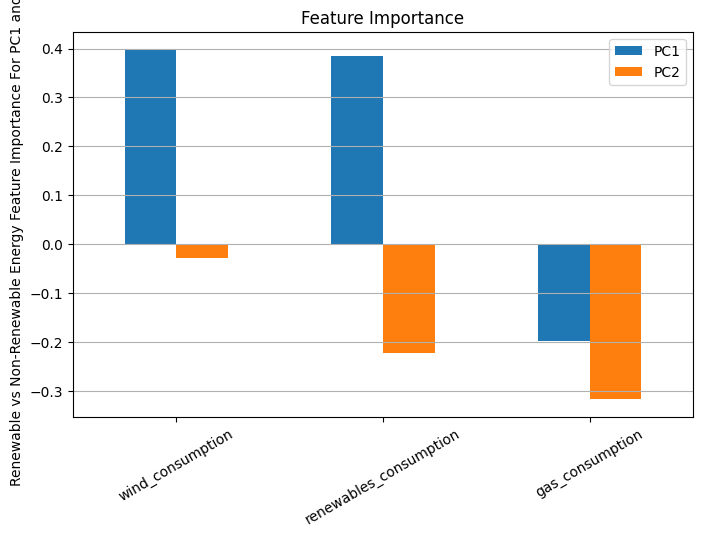

In [213]:
### Graphing important features
# Loadings for selected features on PC1 and PC2
features = ['wind_consumption', 'renewables_consumption', 'gas_consumption']
pc1_loadings = [0.3982848 , 0.384032, -0.196908]
pc2_loadings = [-0.028839, -0.221918, -0.316942]  

# Create DataFrame
loadings_df = pd.DataFrame({
    'PC1': pc1_loadings,
    'PC2': pc2_loadings
}, index=features)

# Plot
loadings_df.plot(kind='bar', figsize=(8,5))
plt.title('Feature Importance')
plt.ylabel('Renewable vs Non-Renewable Energy Feature Importance For PC1 and PC2')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

Next graphing the data points in principal component space can help visualize trends, especially if points can be identified by country and year. The following graph will plot the data points among principal component's 1 & 2 space, coloring the points by year to show energy trends over the years and shaping the points differently to see any differing or similar energy profile trends among Croatia and Slovenia.

In analying the graph, there is clear movement over the years that go from left to right across the first principal component axis. This shift likey represents the shift from fossil fuels to renewable energy in recent years, as breifly disucssed when looking at the weights of the energy features of principal component 1. Principal component 2 is lessed nuanced but again likely shows how energy consumption changes over time, with less ebergy consumption pre-industrial period to an influx of high energy consumption of fossil fuels and a more modern attempt to switch towards alternative sources of energy. Overall, both countries move in the same general direction in principal component space likely hinting that these trends are global and impact multiple countries. 

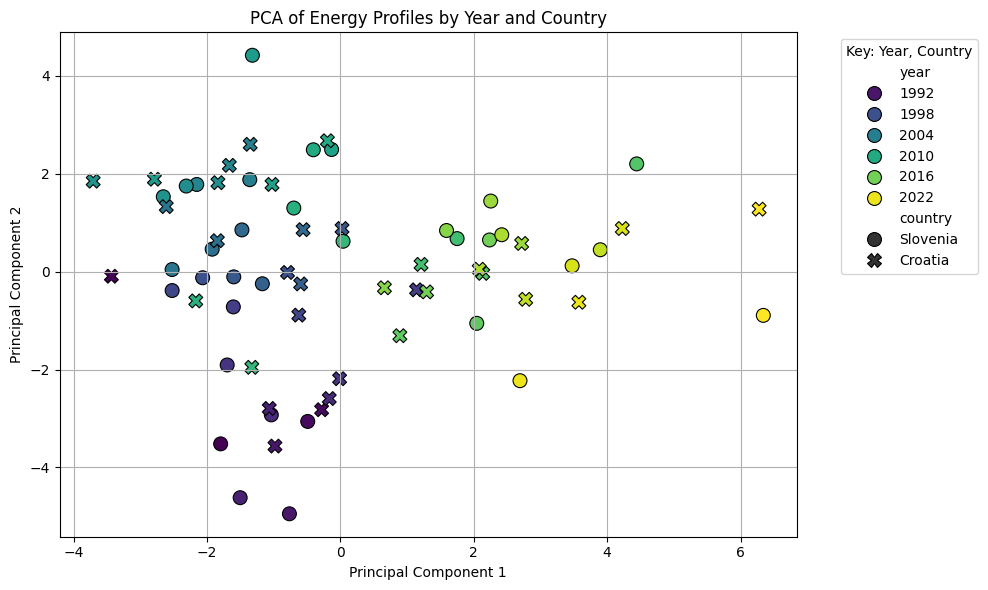

In [214]:
import seaborn as sns

# df is original data and x_pca is the PCA result
pca_df_plot = pd.DataFrame({
    'PC1': x_pca[:, 0],
    'PC2': x_pca[:, 1],
    'year': df.index,
    'country': df['country'].values
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_plot, x='PC1', y='PC2', hue='year', style='country',
                palette='viridis', s=100, edgecolor='k')

plt.title('PCA of Energy Profiles by Year and Country')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Key: Year, Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Lastly, analyzing important features by country and year will help explore direct relationships between energy profiles, the features changes over time, and patterns specific to different countries. The following graph will further explore important features from the first principal component, comparing fossily fuel consumption versus renewable energy consumption. 

Based on the graph comparing fossil fuel and renewable consumption, there is a progression over the years, with early years (darker colors, e.g., 1992–1995) clustered at the bottom left of the graph, showing overall low consumption among the two countries. Middle years (pinky tones, eg. 1997-2005) are spread across the right side of the graph showing an increased fossil consumption over this period. However, a recent shift (orange/yellow, eg. post 2010) shows a decrease in fossil fuel consumption and increase in renewable energy. This is showing the two countries progression from fossil fuel consumption in the industrial boom and into the new era of renewable energy.

The graph also attempts to show a distinction between Croatia and Solvenia's energy profiles, but we see that the circles and squares often overlap implying these countries follow similar enery profiles and trends throughout the years, similar to trends seen in the prior graph.

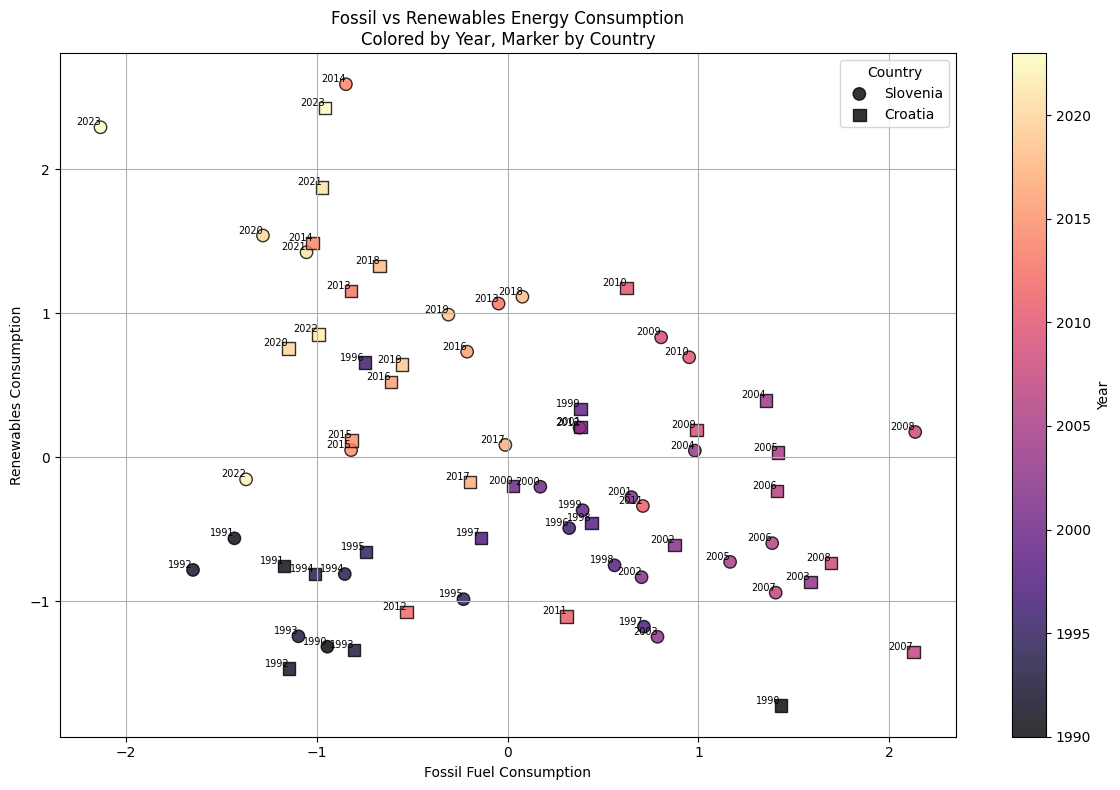

In [215]:
# Features to use
features = ['fossil_fuel_consumption', 'renewables_consumption']

# Scale features and preserve index
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_df[features])
df_scaled = pd.DataFrame(scaled_features, columns=features, index=df.index)

# Add metadata
df_scaled['country'] = df['country'].values
df_scaled['year'] = df.index

# Unique countries and markers
unique_countries = df_scaled['country'].unique()
markers = ['o', 's'] 
marker_map = {country: markers[i % len(markers)] for i, country in enumerate(unique_countries)}

# Plot
plt.figure(figsize=(12, 8))

for country in unique_countries:
    country_df = df_scaled[df_scaled['country'] == country]
    
    plt.scatter(country_df['fossil_fuel_consumption'], 
                country_df['renewables_consumption'], 
                c=country_df['year'], cmap='magma', s=80,
                marker=marker_map[country], label=country, edgecolor='k', alpha=0.8)

# Labels and legend
plt.xlabel('Fossil Fuel Consumption')
plt.ylabel('Renewables Consumption')
plt.title("Fossil vs Renewables Energy Consumption\nColored by Year, Marker by Country")
plt.colorbar(label='Year')
plt.legend(title='Country')

# Optional: add year labels
for i, row in df_scaled.iterrows():
    plt.text(row['fossil_fuel_consumption'], row['renewables_consumption'], 
             str(row['year']), fontsize=7, ha='right', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

### SVD
Each row of **U** can be interpreted as one observation (in our case, each year) that has 12 scores, each one representing the principal component it is associated with (e.g., the first index in the row represents the first principal component). All these observations indicate how each load onto each principal component. For example, taking the first column of U (PC1), it shows us how all the years are being loaded/projected onto the first principal component.

Grpahing the projection of the data points onto SVD component space (U @ np.diag(S)) and differentiating points by the country and year will help distinguish energy profile trends in reduced dimensionality space. The following graph closely resembles the graph in the PCA analysis which looked at the trends of PC1 and PC2. The SVD model seems to find similar trends here, with SVD component 1 picking up some sort of longitdudinal trend that shifts throughout the years which is likely that shift towards renewable energies as seen in PCA PC 1. Similarly SVD component 2 seems to visualize something similar to PCA PC2, likely energy consumption levels throughout the years, with the countries having very similar energy profiles.

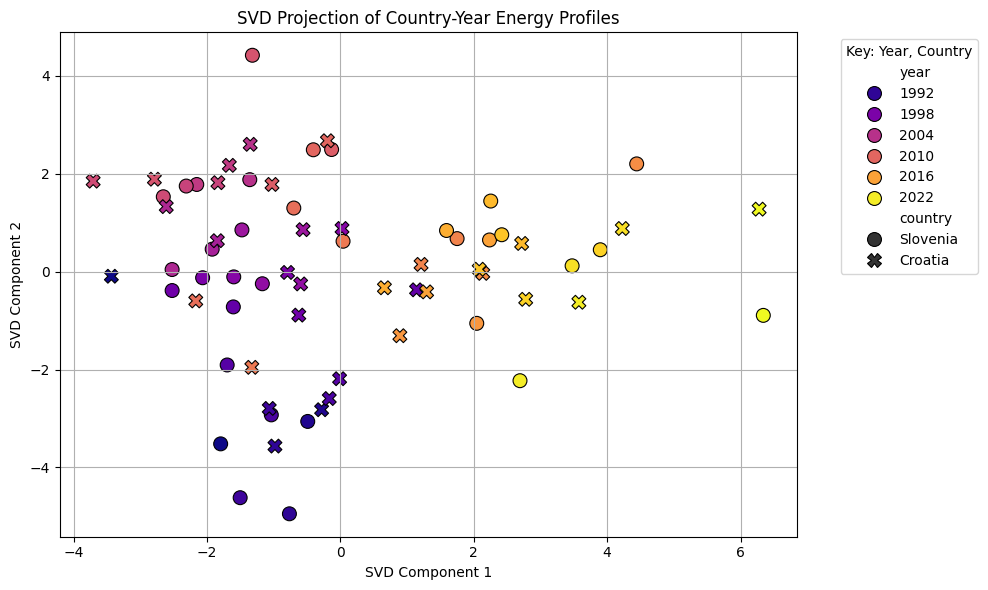

In [216]:
# Convert U @ S to scores
scores = U @ np.diag(S)

# Create a dataframe for scores
scores_df = pd.DataFrame({
    'SVD1': scores[:, 0],
    'SVD2': scores[:, 1],
    'year': df.index,
    'country': df['country'].values
})

# Plot U @ S 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scores_df, x='SVD1', y='SVD2', hue='year', style='country',
                palette='plasma', s=100, edgecolor='k')
plt.title('SVD Projection of Country-Year Energy Profiles')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Key: Year, Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Each row of **Vt** can be interpreted as how each feature is weighted on each principal component. So the larger the value (in magnitude), the more that feature influences the corresponding principal component, and positive and negative values show whether the feature contributes in the same direction as the component or in the opposite direction. Therefore, if one looks at the first row of Vt, it can be seen which features are most responsible for the variation captured by the first principal component.

The following barplot graphs all the weights seen in the first SVD component, which explores the weights or contributions of each energy feature for the first component. Similarly to what was assumed in the previous graph of component 1, there are similar trends as seen in PCA PC 1, where there are high postiive values for renewable energies like solar, wind, etc. and low negative values for non renewable energy consupmtions like fossil fuels, coal, and gas. The first SVD component likely represents some shift towards renewable energies, with prominent consumptions of renewables defining the common trend here. 

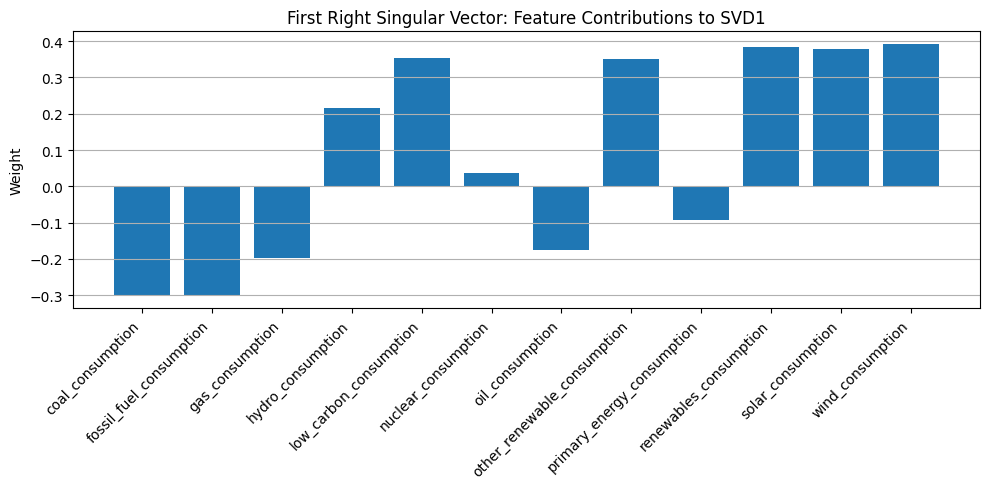

In [217]:
# Plot Vt[0] – contributions of original features to first component
plt.figure(figsize=(10, 5))
plt.bar(pca_df.columns, Vt[0])
plt.xticks(rotation=45, ha='right')
plt.title('First Right Singular Vector: Feature Contributions to SVD1')
plt.ylabel('Weight')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Matrix Completion

The first iteration of matrix completion shows that the mean squared error is relatively low, which means that the low rank approximation matched the data well. The relative error is negative, but esentially neglible. This indicated that the approximation has not really gotten worse than baseline and is almost stable.

The correlation shows a strong positive correlation of 96.08% between imputed and actial values, showing that the imputed data captures the underlying trends in the data.

In [264]:
print(f"Iteration: {iter_}, Mean Squared Error: {mss:.6f}, Relative Error: {rel_err:.6f}")
print(f"Correlation between imputed and true missing values: {corr:.4f}")

Iteration: 1, Mean Squared Error: 0.063346, Relative Error: -0.063626
Correlation between imputed and true missing values: 0.9608


#### KMeans Clustering

Graphing the data points by showing distincy clusters can help show similarities and trends for distinct energy phases. The following graph explores trends among renewable energy consumption and fossil fuel consumption by country and year. There are three distinct clusters in the graph.

The bottom left cluster (yellow points) show the early years of both countries where there is likely an overall lower energy consumption with some use of fossil fuels and esentially no introduction of renewable energy. 

The middle cluster (black) shows middle to modern years showing a substantial boost in energy consumption in both Croatia and Slovenia, particularly in fossil fuels. This likely represents the industrialization and growth period for both countries.

Finally the right most cluster (purple) shows the modernized years where there is a substantial drop on fossil fuel use and adaptability to renewable energy. There are clear efforts to reduce energy use overall, hinting towards a postive response to climate change and enregy reduction impacts in recent years for these countries. 

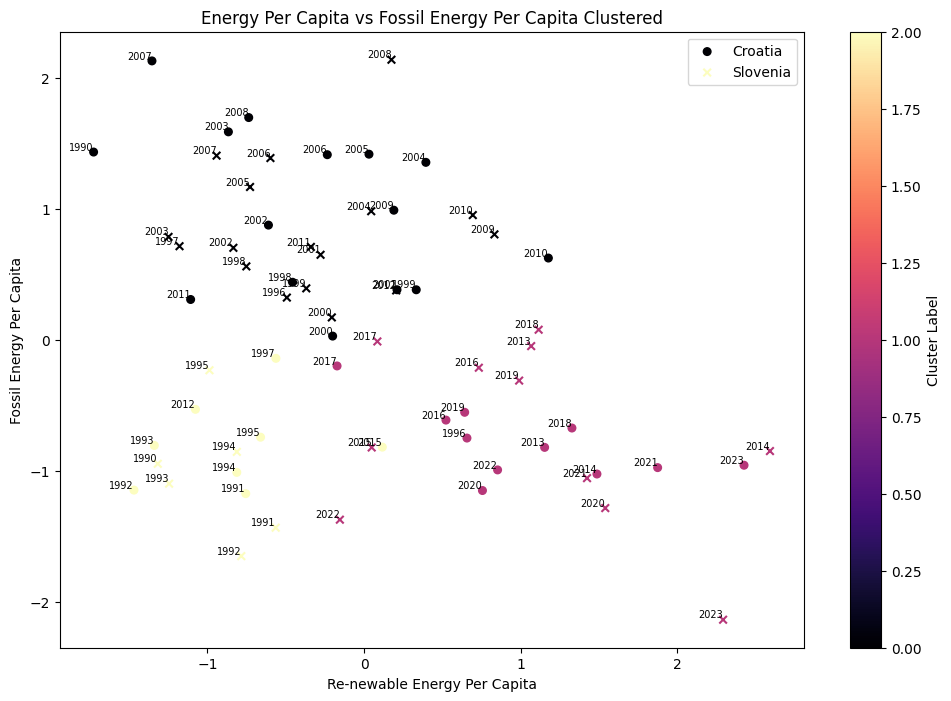

In [218]:
plt.figure(figsize=(12,8))

# Plot Croatia
croatia_mask = df['country'] == 'Croatia'
plt.scatter(
    k_means_df.loc[croatia_mask, 'renewables_consumption'],
    k_means_df.loc[croatia_mask, 'fossil_fuel_consumption'],
    c=kmeans.labels_[croatia_mask], 
    cmap='magma',
    s=30,
    marker='o',
    label='Croatia'
)

# Plot Slovenia
slovenia_mask = df['country'] == 'Slovenia'
plt.scatter(
    k_means_df.loc[slovenia_mask, 'renewables_consumption'],
    k_means_df.loc[slovenia_mask, 'fossil_fuel_consumption'],
    c=kmeans.labels_[slovenia_mask], 
    cmap='magma',
    s=30,
    marker='x',
    label='Slovenia'
)

plt.xlabel('Re-newable Energy Per Capita')
plt.ylabel('Fossil Energy Per Capita')
plt.title('Energy Per Capita vs Fossil Energy Per Capita Clustered')

plt.colorbar(label='Cluster Label')
plt.legend()

# Add year labels if you want to annotate points
for i, year in enumerate(df.index):
    plt.text(k_means_df.iloc[i]['renewables_consumption'], 
             k_means_df.iloc[i]['fossil_fuel_consumption'], 
             str(year), fontsize=7, ha='right', va='bottom')

plt.show()

A deeper dive into each cluster shows which points (country and years) are grouped in each cluster, as well as feature importance for each energy consumption variable that shows their respective impacts on patterns/ trends within each cluster. Overall both countries, Croatia and Slovenia, are represented in each cluster. Each cluster seems to be more seperated by their year and represented different energy profile trends through time.

Cluster 0: 2013–2022 (Recent Years)

High in: Low-carbon consumption, renewables, solar, wind, and other renewable consumption (all strongly positive scores).
Low in: Fossil fuel and oil consumption.
These are recent years where both countries made a significant shift toward renewables (especially solar and wind) while reducing fossil fuel and oil consumption. This reflects a period of strong adoption of clean energy sources and decline in fossil fuel dependence.

Cluster 1: 1990, 2001-2011 (Stability and Recovery)

High in: coal, fossil fuel, oil and gas consumption
Low in: renewable consumption, other renwables, solar, wind
This group reflect a period beofre or during shifts towards renewable energy but heavy reliance on fossil fules, characterized by lower overall energy use and particularly low renewable adoption. It likely reflects the counrties energy profile before significant changes toward renewables began.

Cluster 2: 1991-2000, 2012, 2015

Overall nergative values, but especially in: primary energy consumption, fossil fuel, and low carbon
This cluster show low energy consumption overall that may likely be due to ecnomic slow downs or recovery perionds. Earlier periods like pre 2000's may show overall lower energy consumption due to infrastructure limmitations and overall lower need for energy.

In [219]:
# Look closer at the structure of feature space 

# Add cluster labels to the dataframe
k_means_df['Cluster'] = kmeans.labels_

# add back meta data
k_means_df['Country'] = df['country'].values
k_means_df['Year'] = df.index

# Number of clusters
num_clusters = kmeans.n_clusters

# Print indices and mean feature values for each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    cluster_data = k_means_df[k_means_df['Cluster'] == i]
    
    print("Years:", cluster_data['Year'].tolist())
    
    print("Countries:", cluster_data['Country'].tolist())
    
    print("Mean values:\n", cluster_data.drop(columns=['Country', 'Year', 'Cluster']).mean())
    print()

Cluster 0:
Years: [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 1990, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
Countries: ['Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Slovenia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia', 'Croatia']
Mean values:
 coal_consumption               0.554283
fossil_fuel_consumption        0.914775
gas_consumption                0.653751
hydro_consumption             -0.031798
low_carbon_consumption        -0.235129
nuclear_consumption            0.162549
oil_consumption                0.753841
other_renewable_consumption   -0.398496
primary_energy_consumption     0.744828
renewables_consumption        -0.3

#### Hierarchical Clustering

After analyzing four different linkage methods for the dendrograms, complete and ward linkage seem to provide the best ways to cluster the energy dataset. To find the optimal number of clusters for each model, the slihouette score will be evaluated where the higher value (closest to a score of 1) shows good cluster groupsing and disctinctness from other clusters. 

For the complete linkage model, the silhouette score is optimal (highest point) where four clusters are present. This means that using complete linkage finds three distinct clusters or patterns to provide meaningful insights towards describing the dataset. The ward linkage method is optimal at three clusters. 

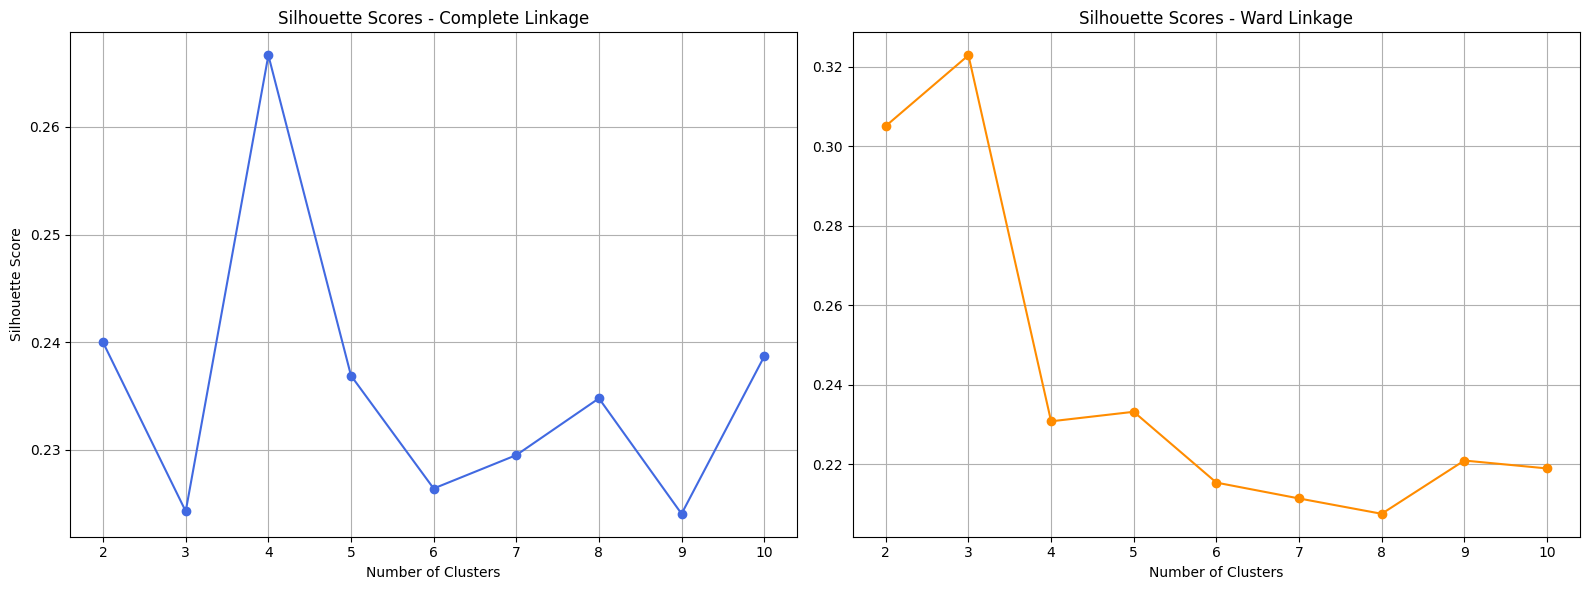

In [220]:
# Fit Complete linkage model
X = features_scaled
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(X)
link_complete = compute_linkage(model_complete)
range_complete, scores_complete = evaluate_clusters_silhouette(X, link_complete)

# Fit Ward linkage model
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(X)
link_ward = compute_linkage(model_ward)
range_ward, scores_ward = evaluate_clusters_silhouette(X, link_ward)

# plot silhouette for both linkage methods
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(range_complete, scores_complete, 'o-', color='royalblue')
axs[0].set_title('Silhouette Scores - Complete Linkage')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].grid(True)
axs[0].set_xticks(range_complete)

axs[1].plot(range_ward, scores_ward, 'o-', color='darkorange')
axs[1].set_title('Silhouette Scores - Ward Linkage')
axs[1].set_xlabel('Number of Clusters')
axs[1].grid(True)
axs[1].set_xticks(range_ward)

plt.tight_layout()
plt.show()


After analyzing four different linkage methods for the dendrograms, complete and ward linkage provide the optimal clustering for this dataset as the results show clear and effective clustering with minimal chaining. 

The complete linkage dendrogram forms 4 fairly distinct clusters with good seperation. Early periods liekly represent low energy consumption, then a shift towards fossil fuels and indstrialization. Interestingly it seems as if Croatia 2023 and Slovenia 2022-23 has some trends of more modern energy profiles that are substantially distinct from other time periods, likely representing a shift towards renewables and maybe lower energy consumption overall. This would be a great model to explore differences or similarities between Croatia and Slovenia and comparing energy profiles among time preiods, as complete linkage provides the best balance and minimal chaining. 

The ward linkage dendrogram shows 3 distinct clusters, with stronger seperation and compact clusters than complete linkage. The modern energy profiles still show a distinct outlier group that likely is a strong push towards conservation and renewable energies, but energy trends throughout ealrier years like in the 1900's and early 2000's are much more distinct and clearly seperated. This model would be effective in tracking energry trend across certain eras or periods of time. 

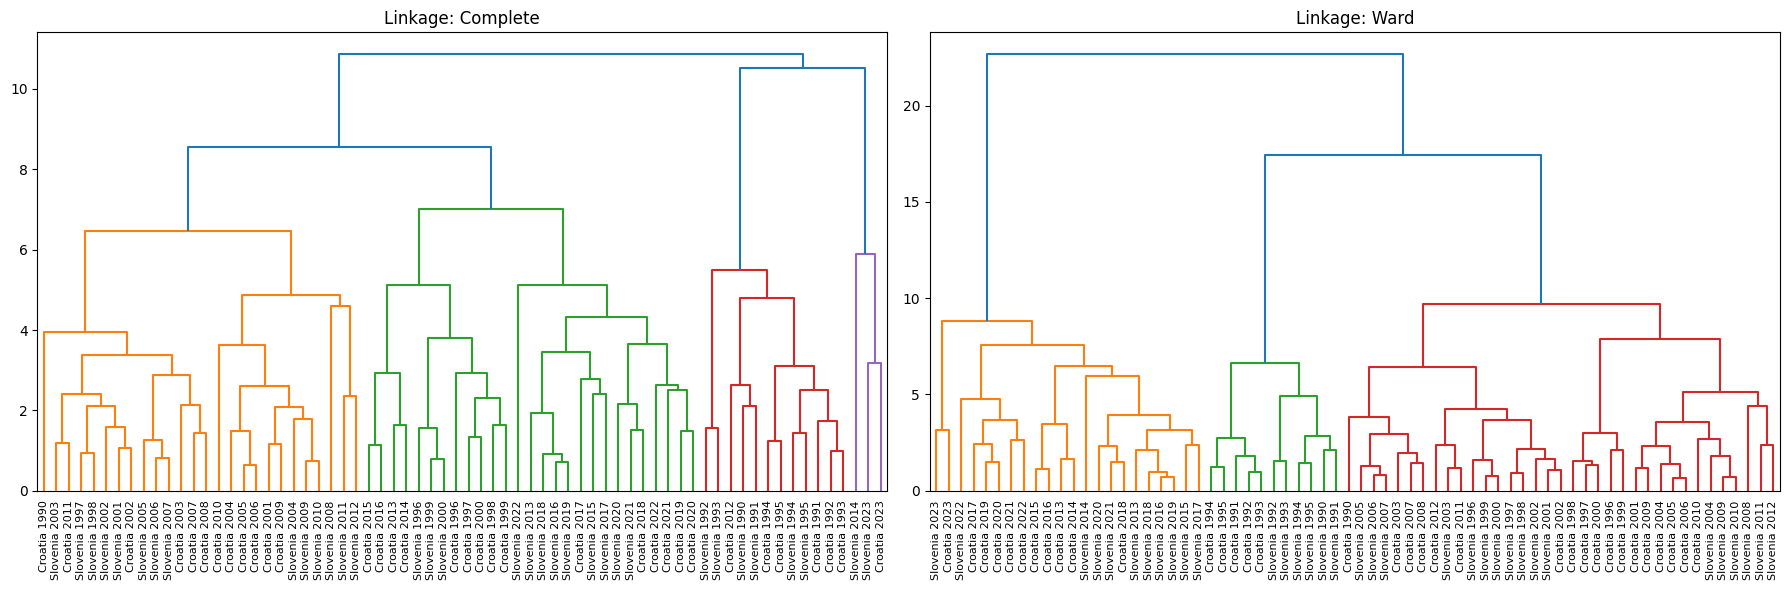

In [221]:
# Plotting optimal clustering dendrograms
linkages = ['complete', 'ward']
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for ax, method in zip(axs, linkages):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    model = model.fit(X)
    Z = compute_linkage(model)
    
    ax.set_title(f"Linkage: {method.capitalize()}")
    dendrogram(Z, ax=ax, labels=labels, leaf_rotation=90)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


## Discussion

PCA effectively reduced the dimensionality of the datasets while preserving the core structure of the data, hence was able to provide insightful trends and patterns from Croatia and Slovania's energy profiles throughout the years. The dominant trend in both Croatia and Slovenia is a shift in energy consumption patterns, moving from fossil fuels toward renewables over the years. The dimensionality reduction shows that a small number of components (mainly PC1) account for most of the variance, making PCA a valuable tool for visualizing and understanding long-term trends in energy data.

SVD performed quite similarly to PCA, showcasing the pros of using dimensionality reduction to analyze energy profile data. Similar trends were found by projecting data points into SVD component space, seeing trends in types of energy consumption shifts as well as overall level of energy consumption within the first two components. There is also similar trends in the first component that captures a surge in renewable energy consumption.

Matrix completion is another dimensionality reduction technique, that demonstrates how well trends of energy profiles can be captured by using existing data. Imputed data points using matrix completion has strong correlations to actual data points, yet again showcasing the effectiveness of dimensionality reduction in this dataset.

The KMeans model effectively grouped the years into about 3 or 4 clusters, with similar trends occuring in both Croatia and Slovania throughout the years. The main trend seen among KMeans clustering is the transition from fossil fuels to renewable energy. The most recent years (2013-2022) show a significant shift towards renewable energy, pariculatlry solar and wind energy. The middle years (2001-2011) show high fossily fuel consumptions, indicating high industrial activity and energy demands during a time when renewable energy was not widely adopted. Lastly the early years (1991-2001) shows over all low energy consumption, with some fossil fuel usage and basically no renewable energy implementations yet. The KMeans model validates and gives additional insights into our PCA findings, describing the major types of energy usage throughout the years.

Finally, the dendrogram provides a visual representation that groups Croatia and Slovenia throughout the years to represent different energy profile trends. The best linkage methods proved to be complete and ward, which showcased distinct and meaningful clusters at 4 and 3 optimal clusters respectively. Both dendrograms seemed to highlight similar findings with general groups that focused on pre-industrial energy profile usage, an era of energy consumption boom, and distinctly modern energy profiles.

## Conclusion

This study demonstrates the power of unsupervised learning techniques like PCA, KMeans clustering, and hierarchical clustering, in uncovering meaningful patterns within energy consumption data for Croatia and Slovenia. Despite the datasets originating from different countries, the trends revealed were remarkably similar, suggesting a shared trajectory in their energy transitions over the past three decades. Mainly, highlighting the dominant shift from fossil fuel reliance to renewable energy adoption. 

Identifying long term trends in countries using energy profiles reflects broader global energy transition patterns, which can be used to support ongoing policy changes and enviornemntal efforts. Understanding this newfound shift towards renewable energy can help inform goverments, researchers, and energy providers to better understand historical patterns and make data driven investments about future decisions. This study shows how unsupervised learning technaiques can go beyond simple predictions tasks, to inform strategic decisions about energy, the enviornment, and sustainability.  